In [177]:
import numpy as np 
import pandas as pd
import seaborn as sns

In [178]:
Data = pd.read_csv('boston.csv')
Data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
390,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
391,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
392,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [179]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Data.drop('MEDV', axis=1), Data['MEDV'], test_size=0.33, random_state=0)
x_train.shape, x_test.shape

((263, 13), (131, 13))

In [180]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
model.score(x_test, y_test)


0.8549651975078003

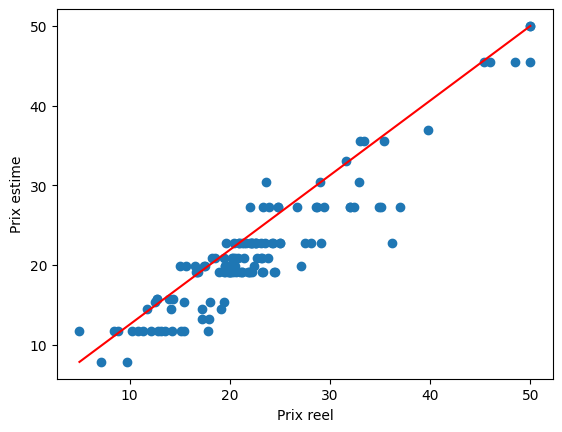

In [181]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Prix reel')
plt.ylabel('Prix estime')
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)],color='red')
plt.show()




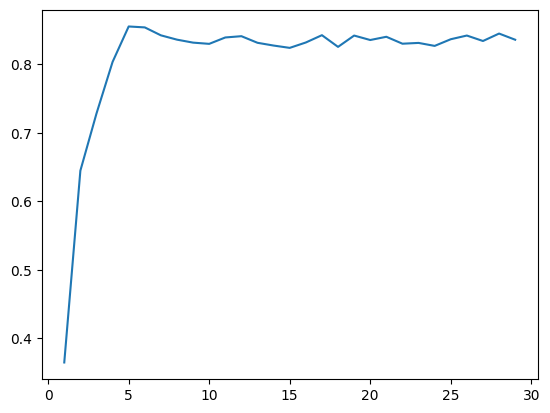

In [182]:
score = []
for i in range(1, 30):
    model = DecisionTreeRegressor(max_depth=i)
    model.fit(x_train, y_train)
    score.append(model.score(x_test, y_test))
plt.plot(range(1, 30), score)

In [183]:
model = DecisionTreeRegressor(max_depth=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
model.score(x_test, y_test)

0.8549651975078004

In [184]:
importance = pd.DataFrame(data=model.feature_importances_, index=model.feature_names_in_, columns=['Importance'])
importance.sort_values(by='Importance', ascending=False)

,Importance
RM,0.642410
LSTAT,0.229463
CRIM,0.038231
DIS,0.036204
RAD,0.023473
TAX,0.013305
PTRATIO,0.006336
INDUS,0.006011
NOX,0.004333
B,0.000233


In [185]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=5)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8525529802108015

In [186]:
Data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
390,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
391,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
392,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [187]:
Data.mean()

CRIM         3.690136
ZN          11.460660
INDUS       11.000863
CHAS         0.068528
NOX          0.553215
RM           6.280015
AGE         68.932741
DIS          3.805268
RAD          9.403553
TAX        406.431472
PTRATIO     18.537563
B          358.490939
LSTAT       12.769112
MEDV        22.359645
dtype: float64

In [188]:
from sklearn.preprocessing import StandardScaler
model = StandardScaler()
df = pd.DataFrame(model.fit_transform(Data), columns=Data.columns)
df.mean()

CRIM      -1.803408e-16
ZN         2.930538e-17
INDUS     -5.410224e-17
CHAS      -6.311928e-17
NOX        5.410224e-16
RM         3.020708e-16
AGE       -1.442726e-16
DIS        9.017040e-18
RAD        7.213632e-17
TAX        3.606816e-17
PTRATIO    3.967498e-16
B         -9.017040e-17
LSTAT     -3.967498e-16
MEDV      -1.082045e-16
dtype: float64

In [189]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.400818,0.273342,-1.259620,-0.271237,-0.134687,0.423161,-0.134014,0.135851,-0.974609,-0.656944,-1.496303,0.430740,-1.067126,0.179640
1,-0.398535,-0.479051,-0.569724,-0.271237,-0.745475,0.202245,0.357849,0.554334,-0.858633,-0.978184,-0.340879,0.430740,-0.497196,-0.083191
2,-0.398537,-0.479051,-0.569724,-0.271237,-0.745475,1.298216,-0.281214,0.554334,-0.858633,-0.978184,-0.340879,0.385097,-1.197278,1.351424
3,-0.397984,-0.479051,-1.278462,-0.271237,-0.842847,1.029962,-0.830521,1.076829,-0.742657,-1.097162,0.075073,0.405283,-1.346610,1.209058
4,-0.398258,-0.479051,-1.278462,-0.271237,-0.842847,0.215156,-0.367380,1.076829,-0.742657,-1.097162,0.075073,0.399564,-1.035615,0.694349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,-0.382157,-0.479051,-0.189991,-0.271237,0.281356,-1.019964,0.163976,-0.670530,-0.394730,-0.091800,0.306158,0.418068,0.319337,-0.532192
390,-0.377092,-0.479051,-0.189991,-0.271237,0.281356,-0.362955,0.386570,-0.623629,-0.394730,-0.091800,0.306158,0.430740,0.213845,-0.608851
391,-0.396580,-0.479051,0.134666,-0.271237,0.175132,-0.229545,0.278863,-0.724158,-0.974609,-0.793769,1.138063,0.430740,-0.505417,-0.192703
392,-0.394895,-0.479051,0.134666,-0.271237,0.175132,0.998402,0.792268,-0.781413,-0.974609,-0.793769,1.138063,0.430740,-0.976704,0.168688
